In [218]:
# подгружаемся
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn import decomposition
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

from sklearn.datasets import make_blobs

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [219]:
# читам данные
spine = pd.read_csv('column_3C_weka.csv')
spine.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [220]:
# знакмимся с данными (все чисто)
spine.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [221]:
### Задание 1. Scatter plot ###

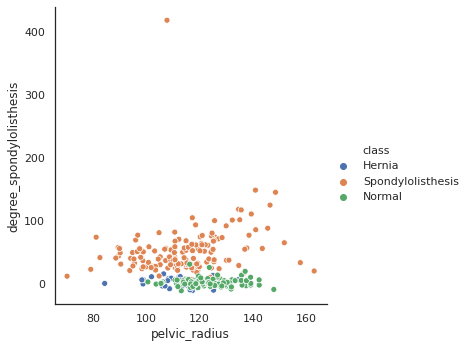

In [222]:
# рисуем scatter plot для базовой классификации
sns.relplot(x = 'pelvic_radius', y = 'degree_spondylolisthesis', hue = 'class', data = spine)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis


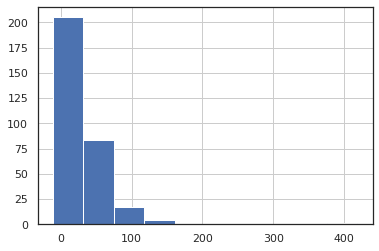

In [223]:
# видим отскакивающее значение для пациента со смещением позвоночника
spine.degree_spondylolisthesis.hist()
# выгляждит так, как будто это выброс...
spine[spine.degree_spondylolisthesis > 400]

In [237]:
# создадим датафрейм для работы без выброса и переменной class
tmp_df = spine[spine.degree_spondylolisthesis < 400]
spine_class = np.array(tmp_df['class'])
radius_and_degree = np.array(tmp_df[['pelvic_radius', 'degree_spondylolisthesis']])

In [225]:
### Задание 2. Оцениваем оптимальное количество кластеров, иллюстрируем графиком ###

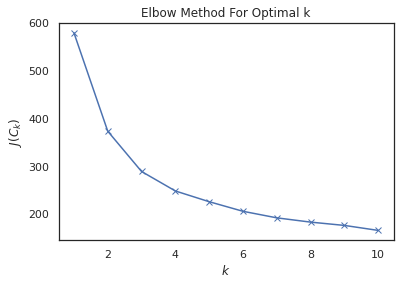

In [226]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(radius_and_degree)
    distortions.append(np.sqrt(km.inertia_))

# plot
plt.plot(range(1, 11), distortions,'bx-')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
Гениальное высказывание с этого туториала:
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
"Если график выглядит как рука, то локоть на руке - это оптимальное k"
Оптимальное k=3

In [ ]:
### Задание 3 ###
классификатор напиши
оптимальное число k учти
кластеризацию проведи
визуализацию отобрази
дрова наруби
воды принеси

In [228]:
# пишем классификатор K-means на основе оптимального n_clusters=3
km = KMeans(n_clusters=3, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
predict_km = km.fit_predict(radius_and_degree)

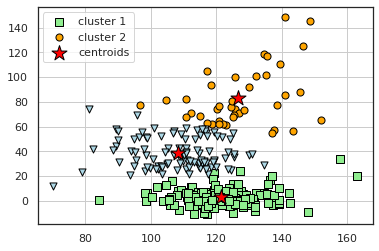

In [229]:
plt.scatter(
    radius_and_degree[predict_km == 0, 0],
    radius_and_degree[predict_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    radius_and_degree[predict_km == 1, 0],
    radius_and_degree[predict_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    radius_and_degree[predict_km == 2, 0],
    radius_and_degree[predict_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
### Задание 4 ###
написать иерархический классификатор (агломеративный метод)
попробовать подобрать метод для наилучшей кластеризации
        +
### Задание 5 ###
визуализация
вывод о лучшем методе

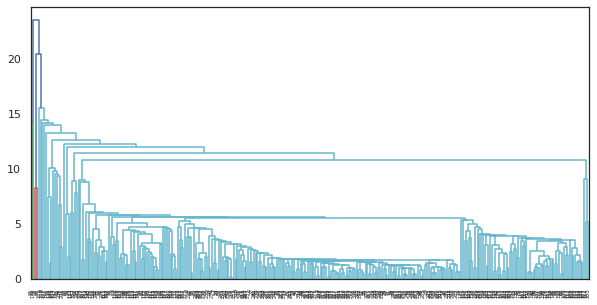

In [232]:
# пишем иерархический классификатор (агломеративный метод)

# минимум попарных расстояний между точками из двух кластеров
distance_mat = pdist(radius_and_degree) # верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=17)

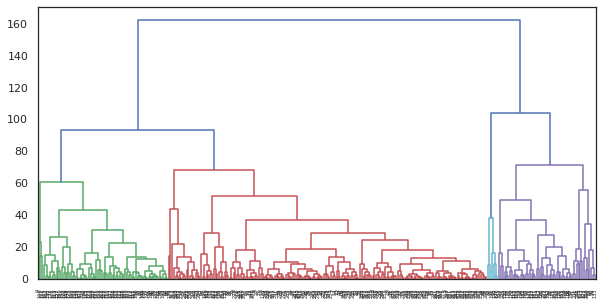

In [231]:
# максимум попарных расстояний между точками из двух кластеров
distance_mat = pdist(radius_and_degree) # верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'complete')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=80)

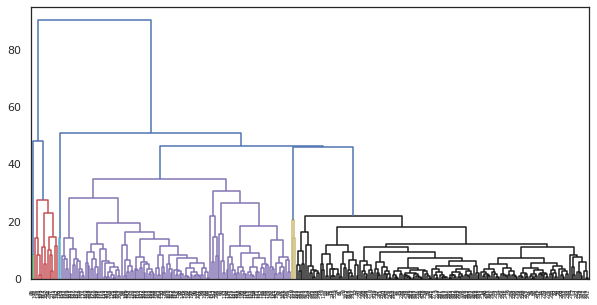

In [233]:
# среднее попарных расстояний между точками из двух кластеров
distance_mat = pdist(radius_and_degree) # верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'average')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=40)

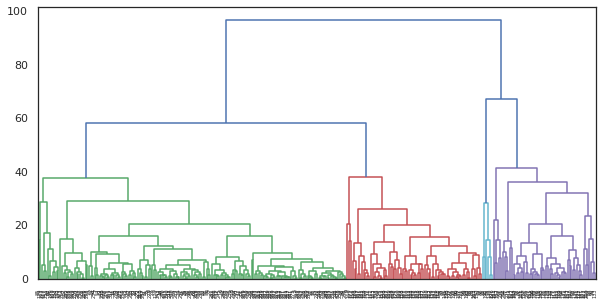

In [234]:
# UPGMA
distance_mat = pdist(radius_and_degree) # верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'weighted')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=50)

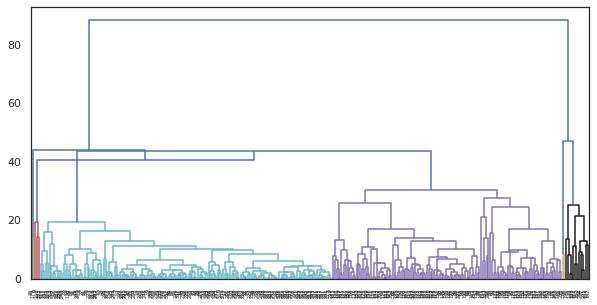

In [235]:
# расстояние между центроидами двух кластеров
distance_mat = pdist(radius_and_degree) # верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'centroid')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=40)

In [ ]:
Неплохо работает максимум попарных расстояний и UPGMA, разделяя данные на три четких кластера

In [ ]:
### Задание 6 ###
cравнить метрики качества модели
'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure'
сделать вывод, какой алгоритм использовать лучше всего

In [238]:
# смотрим на метрики для всех алгоритмов
algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=3))

data = []
for algo in algorithms:
    algo.fit(radius_and_degree)
    data.append(({
        'ARI': metrics.adjusted_rand_score(spine_class, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(spine_class, algo.labels_),
        'Homogenity': metrics.homogeneity_score(spine_class, algo.labels_),
        'Completeness': metrics.completeness_score(spine_class, algo.labels_),
        'V-measure': metrics.v_measure_score(spine_class, algo.labels_),
        'Silhouette': metrics.silhouette_score(radius_and_degree, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI','Homogenity'
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,HomogenityCompleteness,V-measure,Silhouette
K-means,0.410439,0.530457,NaN,0.533551,0.522468
Affinity,0.123156,0.318932,NaN,0.344570,0.361751
Spectral,0.404400,0.541187,NaN,0.544119,0.485692
Agglomerative,0.428791,0.575845,NaN,0.578558,0.497434


In [ ]:
### Adjusted Rand Index (ARI) ###
Rand Index это доля объектов, для которых эти разбиения "согласованы", Adjusted Rand Index его нормированная версия.
Данный индекс является мерой расстояния между различными разбиениями выборки.
Отрицательные значения соответствуют "независимым" разбиениям на кластеры,
значения, близкие к нулю, — случайным разбиениям,
и положительные значения говорят о том, что два разбиения схожи.

Видим, что алгоритм Affinity имеет ARI, близкий к нулю, т.е. разбиения могут быть и случайны.
Остальные алгоритмы по этому индексу примерно одинаковы, но Agglomerative чуть получше, чем остальные

In [ ]:
### Adjusted Mutual Information (AMI) ###
Определяется как взаимная информация для двух распределений, соответствующих разбиениям выборки на кластеры.
Значения, близкие к нулю, говорят о независимости разбиений, а близкие к единице – об их схожести.

Affinity снова проигрывает и по данной метрике, а лучше всего себя показывает Agglomerative алгоритм.

In [ ]:
### Гомогенность, полнота, V-мера ###
Формально данные меры также определяются с использованием функций энтропии и условной энтропии,
рассматривая разбиения выборки как дискретные распределения.

Большие значения соответствуют более точной кластеризации.
Affinity снова проигрывает и по данной метрике, а лучше всего себя показывает Agglomerative алгоритм.

In [ ]:
### Силуэт ###
Позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.
Силуэтом выборки называется средняя величина силуэта объектов данной выборки.

Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения,
близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга,
значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам.

Чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные,
плотно сгруппированные облака точек.

Наиболее плотные и четко выраженнные кластеры характерны для kmeans, Affinity снова всем уступает.